Admission Analyser

Importing necessary 

In [332]:
# !pip install -r requirements.txt

In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Loading the DataFrame

In [334]:
df = pd.read_csv("university_admission.csv")

Visualizing

In [335]:
df.head()

,Serial No.,pre_term_test,final_term_test,university_rating,sop_strength,lor_score,cgpa,has_research_exp,admission_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   pre_term_test      500 non-null    int64  
 2   final_term_test    500 non-null    int64  
 3   university_rating  500 non-null    int64  
 4   sop_strength       500 non-null    float64
 5   lor_score          500 non-null    float64
 6   cgpa               500 non-null    float64
 7   has_research_exp   500 non-null    int64  
 8   admission_chance   500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Dropping unwanted columns

In [337]:
df.isnull().sum()

Serial No.           0
pre_term_test        0
final_term_test      0
university_rating    0
sop_strength         0
lor_score            0
cgpa                 0
has_research_exp     0
admission_chance     0
dtype: int64

In [338]:
df = df.drop('Serial No.', axis=1)

In [339]:
print("Maximum Values\n", df.max())
print()
print("Minimum Values\n", df.min())

Maximum Values
 pre_term_test        340.00
final_term_test      120.00
university_rating      5.00
sop_strength           5.00
lor_score              5.00
cgpa                   9.92
has_research_exp       1.00
admission_chance       0.97
dtype: float64

Minimum Values
 pre_term_test        290.00
final_term_test       92.00
university_rating      1.00
sop_strength           1.00
lor_score              1.00
cgpa                   6.80
has_research_exp       0.00
admission_chance       0.34
dtype: float64


Visualizing using SeaBorn

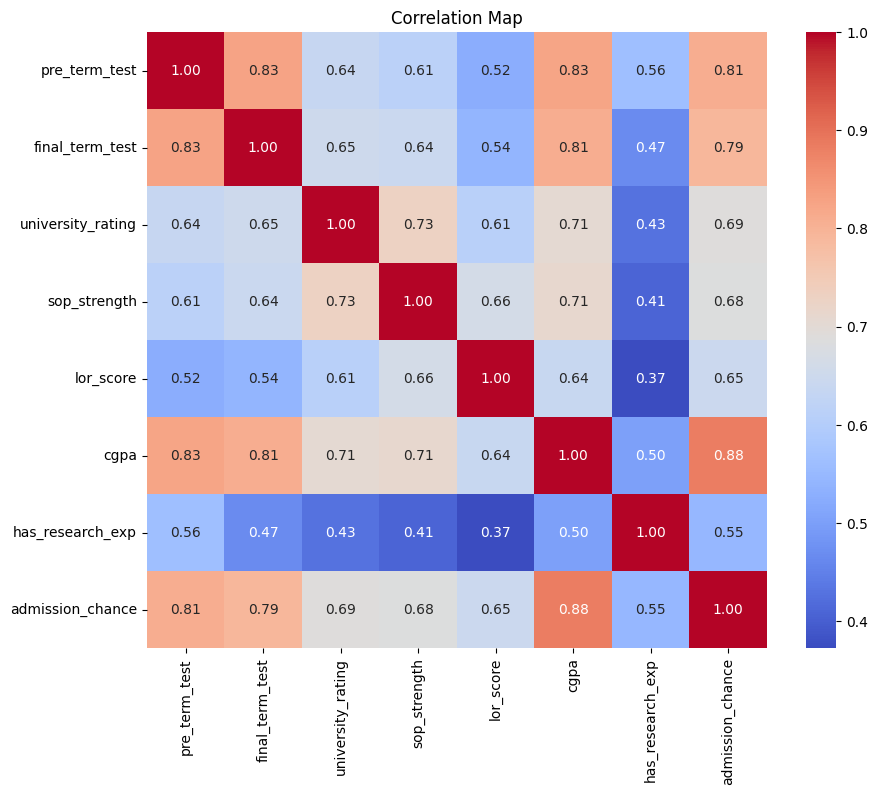

In [340]:
corr_df = df.corr()

plt.figure(figsize= (10,8))
sns.heatmap(corr_df, annot=True, fmt= '0.2f', cmap= 'coolwarm')
plt.title("Correlation Map")
plt.show()

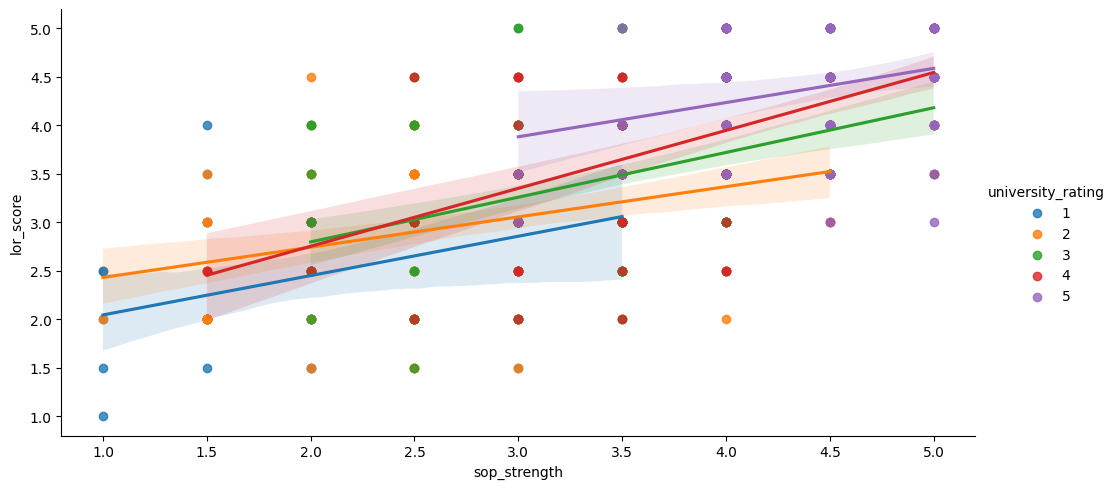

In [341]:
sns.lmplot(x='sop_strength', y= 'lor_score', hue= "university_rating", data= df, aspect=2, height=5)

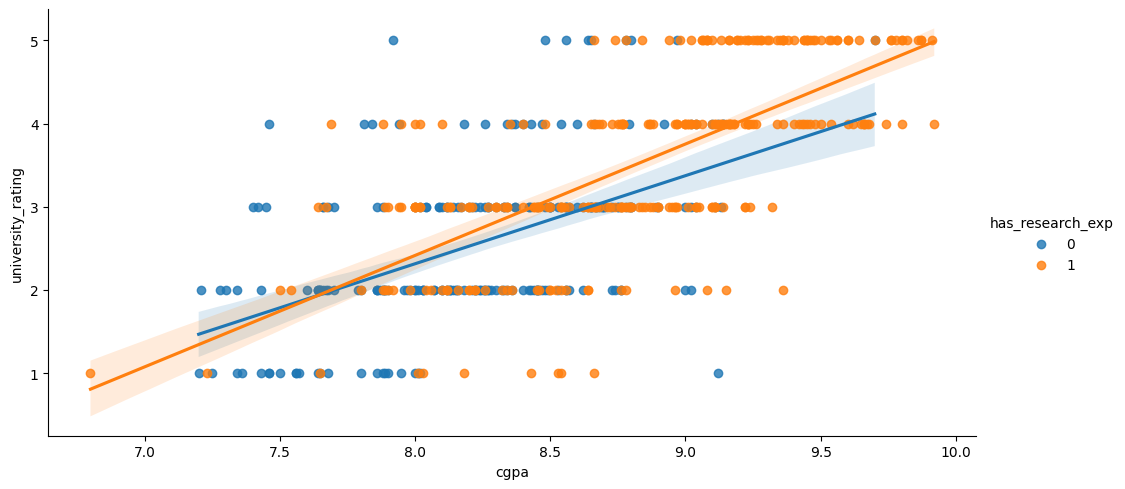

In [342]:
sns.lmplot(x='cgpa', y= 'university_rating', hue= "has_research_exp", data= df, aspect=2, height=5)

Splitting DataFrame into Test and Train with 80% of csv data for training

In [343]:
x = df.drop('admission_chance', axis = 1)
y = df['admission_chance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 65)

Creating a linear regression

In [344]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Predicting the value using Test split

In [345]:
y_prediction = model.predict(x_test)

Testing the prediction with developer level inputs

In [346]:
print(model.predict(np.array([[312,107,3,3,2,7.9,1]]))) #Actual Output in the csv is 0.64
print(model.predict(np.array([[329,114,2,2,4,8.56,1]]))) #Actual Output in the csv is 0.72
print(model.predict(np.array([[298,99,1,1.5,3,7.46,0]]))) #Actual Output in the csv is 0.53

[0.62155698]
[0.76106187]
[0.49069779]


C:\Users\KANISHK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\KANISHK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\KANISHK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluating our Model using Metrics

In [347]:
print("MSE Score: ",mean_squared_error(y_test, y_prediction))
print("R^2 Score: ", r2_score(y_test, y_prediction))


MSE Score:  0.0028047791404953904
R^2 Score:  0.8704504365542649


Final Visualization of our model

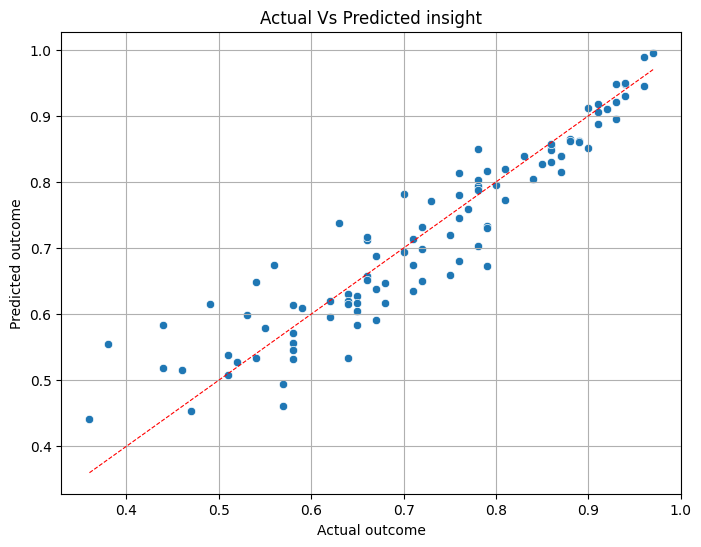

In [348]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=y_test, y=y_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=0.8)
plt.xlabel("Actual outcome")
plt.ylabel("Predicted outcome")
plt.title("Actual Vs Predicted insight")
plt.grid(True)
plt.show()

Dumping our model into a pkl file for machine leanrning processing outside of this notebook

In [349]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [351]:
!streamlit run app.py

^C
